In [1]:
import numpy as np
from pathlib import Path
from IPython.display import Image as displayIMG
from PIL import Image 

In [133]:
label_pth = Path("/srv/share2/apatni30/cvt_labels_argoverse2/adf9a841-e0db-30ab-b5b3-bf0b61658e1e")
timestamp = 315972239260054000

label_pth = Path("/srv/share2/apatni30/cvt_labels_argoverse2/e50e7698-de3d-355f-aca2-eddd09c09533")
timestamp = 315971202060078000

label_pth = Path("/srv/share2/apatni30/cvt_labels_argoverse2/05853f69-f948-3d04-8d64-d4e721c0e1a5")
timestamp = 315974330259989000
aux_path = label_pth.joinpath(f'aux_{timestamp}.npz')
bev_path = label_pth.joinpath(f'bev_{timestamp}.png')
visb_path = label_pth.joinpath(f'visibility_{timestamp}.png')

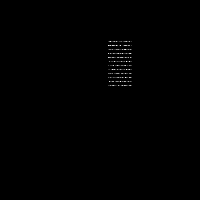

In [134]:
# Test the Auxiliary labels (modulate 0->7 to see the various layers)
# [segmentation, center_score, center_offset_x, center_offset_y, center_o, center_h, center_w]
aux = np.load(aux_path)
Image.fromarray(aux['aux'][:,:,1], mode="L")

In [135]:
def decode(img, n):
    """
    returns (h, w, n) np.int32 {0, 1}
    """
    shift = np.arange(n, dtype=np.int32)[None, None]

    x = np.array(img)[..., None]
    x = (x >> shift) & 1

    return x
bev_semantic_masks = np.asarray(Image.open(bev_path))
bev_semantic_masks = decode(bev_semantic_masks, 11)

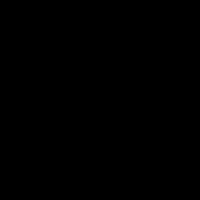

In [142]:
Image.fromarray(bev_semantic_masks[:,:,3], '1')